### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Visualisation of the underlying models 
### (and example code for visualisation of your own solution 


In _models_, all the actually interesting stuff is located, and in _Filters_ you can / should later write your own core code, right now, it is only a dummy implementation. 

Note that the simulation / visualization (second code cell, "inspecting the models, option 2") assumes to have access to an object of type _Localizer_ which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter(sensorR)_. This means that IF you want to make use of the visualisation in grid-view (below!) also for the actual tracking, you MUST implement the filtering in _Filters.HMM_Filter.filter(sensorR)_ (or make changes in _Localizer.Localizer.update()_) and use the _Localizer_.



### Your task 1)

Inspect the **sensor models** given in _models_ with the help of the two ways to visualise them suggested below (or add other visualisations). Prepare yourself to answer the following question in your report: “What is the actual observable difference in the two sensor/observation models, and how does this difference affect the localisation with forward filtering in different settings?”. Inspect and later discuss / explain especially the "no reading" visualisation of the two observation models (also called sensor)! You should base this discussion on your own inspection of the viewer, i.e. by visualising the different observation (sensor) models (“0”, non-uniform failure, and “1”, uniform failure) in the GUI cell, but of course you can also consult the explanations given in the document DetailedInstructionsAndBackground.



## Visualisation as heatmap or simple print-outs


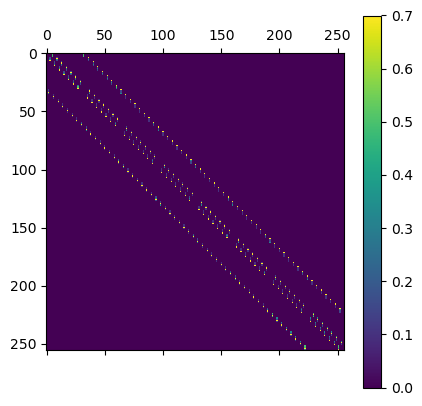

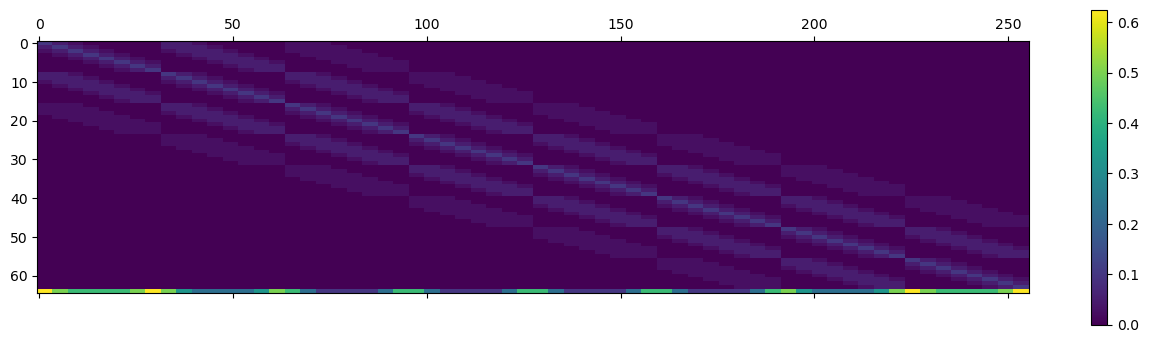

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.625 0.    0.    ... 0.    0.    0.   ]
 [0.    0.625 0.    ... 0.    0.    0.   ]
 [0.    0.    0.625 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.625 0.    0.   ]
 [0.    0.    0.    ... 0.    0.625 0.   ]
 [0.    0.    0.    ... 0.    0.    0.625]]
(False, 6, 0, 0, -1, -1, 0, 0, 6, array([0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.01

In [1]:
from models import *
from view_control.Localizer import Localizer
import numpy as np

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 8, 8)
loc = Localizer( states, 0)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())

np.set_printoptions(threshold = np.inf)
print(sVecs.sum_diags())


## Visualisation in the grid-world



In [1]:
# In view_control.Dashboard, there is simply the handling of all the thread based visualisation provided, 
# no changes needed, but feel free...

from view_control import *

ROWS = 4
COLS = 4

# The dashboard creates a state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. The Localizer calls at the 
# moment a stubb method toDo.Filters.HMMFilter.filter(sensorReading), which just sends back the original 
# probability distribution - no filtering is done. It is your task to implement something useful there.

# Non-uniform failure is the default sensor, sensor 0. Change to 1 if that is your default 
# (uniform sensor failure)
sensorType = 1
dash = Dashboard(ROWS, COLS, sensorType)
display(dash.db)


Output()

new simulation started
true pose = <1,0, 2>, sensed nothing
 nbr of moves: 8, avg error: 2.25, nbr correct guesses: 0
true pose = <0,0, 2>, sensed nothing
 nbr of moves: 9, avg error: 2.0, nbr correct guesses: 1
true pose = <0,1, 1>, sensed nothing
 nbr of moves: 10, avg error: 1.9, nbr correct guesses: 1
true pose = <0,0, 3>, sensed nothing
 nbr of moves: 11, avg error: 1.7272727272727273, nbr correct guesses: 2
true pose = <1,0, 0>, sensed position = <2,2>, guessed position = <0,0>
 nbr of moves: 12, avg error: 1.6666666666666667, nbr correct guesses: 2
true pose = <1,1, 1>, sensed nothing
 nbr of moves: 13, avg error: 1.6923076923076923, nbr correct guesses: 2
true pose = <2,1, 0>, sensed position = <1,2>, guessed position = <0,0>
 nbr of moves: 14, avg error: 1.7857142857142858, nbr correct guesses: 2
